## <center>Social Media Addiction Prediction Model
<center>Using XGBooster Model

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
import joblib

#### Loading Dataset

In [2]:
df = pd.read_csv("sma_data.csv")
df.head()


,Age,Gender,Avg Social Media Usage,Dominant Social Media Platform,Frequency of Social Media Checking,Pre-Sleep Social Media Usage,Type of Social Media Content Consumed,Sleep Latency,Total Sleep Time,Sleep Efficiency,...,Ease of Sleep (Melatonin),Stress (Cortisol),Blue Light Exposure,Stress Level Rating,Anxiety/Depression Rating,Restlessness,Interest Fluctuation,Relationship Status,Loneliness,Addiction level
0,31,0,7,4,2,1,1,5,2,2,...,4,5,1,3,2,5,2,1,4,4
1,20,1,4,0,3,4,1,1,2,5,...,2,1,5,1,4,3,1,1,5,4
2,41,0,5,0,3,1,0,4,3,2,...,1,4,5,4,1,5,3,1,3,4
3,38,0,1,0,1,2,0,4,4,3,...,4,5,4,1,5,3,3,0,3,2
4,19,2,3,1,3,4,1,1,3,2,...,1,3,1,4,4,5,5,1,2,4


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    300 non-null    int64
 1   Gender                                 300 non-null    int64
 2   Avg Social Media Usage                 300 non-null    int64
 3   Dominant Social Media Platform         300 non-null    int64
 4   Frequency of Social Media Checking     300 non-null    int64
 5   Pre-Sleep Social Media Usage           300 non-null    int64
 6   Type of Social Media Content Consumed  300 non-null    int64
 7   Sleep Latency                          300 non-null    int64
 8   Total Sleep Time                       300 non-null    int64
 9   Sleep Efficiency                       300 non-null    int64
 10  Sleep Quality Rating                   300 non-null    int64
 11  Wake After Sleep Onset          

In [4]:
df.describe()

,Age,Gender,Avg Social Media Usage,Dominant Social Media Platform,Frequency of Social Media Checking,Pre-Sleep Social Media Usage,Type of Social Media Content Consumed,Sleep Latency,Total Sleep Time,Sleep Efficiency,...,Ease of Sleep (Melatonin),Stress (Cortisol),Blue Light Exposure,Stress Level Rating,Anxiety/Depression Rating,Restlessness,Interest Fluctuation,Relationship Status,Loneliness,Addiction level
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.006667,0.666667,3.750000,1.883333,2.496667,2.903333,1.016667,2.983333,2.926667,3.080000,...,2.550000,3.016667,3.026667,3.030000,3.056667,2.866667,3.020000,0.500000,2.933333,2.826667
std,8.333754,0.671111,2.051388,1.482243,1.116907,1.358974,0.807400,1.452615,1.393231,1.373519,...,1.112787,1.517916,1.411594,1.426845,1.395210,1.415002,1.451421,0.500835,1.359553,1.452695
min,16.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,23.000000,0.000000,2.000000,1.000000,1.750000,2.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,30.000000,1.000000,3.000000,2.000000,2.500000,3.000000,1.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.500000,3.000000,2.000000
75%,37.000000,1.000000,6.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000
max,44.000000,2.000000,7.000000,4.000000,4.000000,5.000000,2.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000


In [5]:
df.isnull().sum()


Age                                      0
Gender                                   0
Avg Social Media Usage                   0
Dominant Social Media Platform           0
Frequency of Social Media Checking       0
Pre-Sleep Social Media Usage             0
Type of Social Media Content Consumed    0
Sleep Latency                            0
Total Sleep Time                         0
Sleep Efficiency                         0
Sleep Quality Rating                     0
Wake After Sleep Onset                   0
Number of Awakenings                     0
Ease of Sleep (Melatonin)                0
Stress (Cortisol)                        0
Blue Light Exposure                      0
Stress Level Rating                      0
Anxiety/Depression Rating                0
Restlessness                             0
Interest Fluctuation                     0
Relationship Status                      0
Loneliness                               0
Addiction level                          0
dtype: int6

In [6]:
df = df[(df["Age"] >= 16) & (df["Age"] <= 60)] #Outliers removal based on Age
print("Dataset after outlier removal:", df.shape)

Dataset after outlier removal: (300, 23)


#### Data Visualization

##### Addiction level distribution

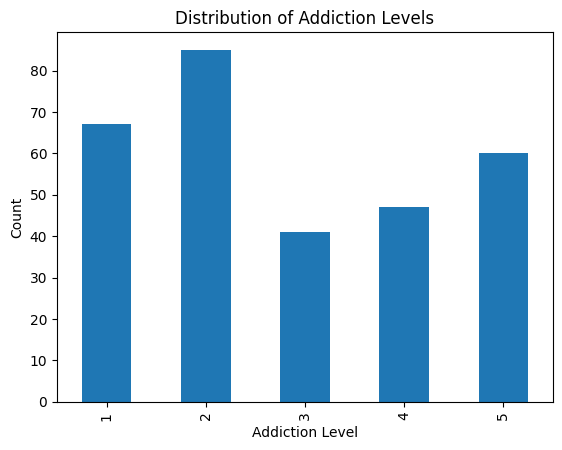

In [7]:
df["Addiction level"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Addiction Level")
plt.ylabel("Count")
plt.title("Distribution of Addiction Levels")
plt.show()

##### Age vs Addiction Level

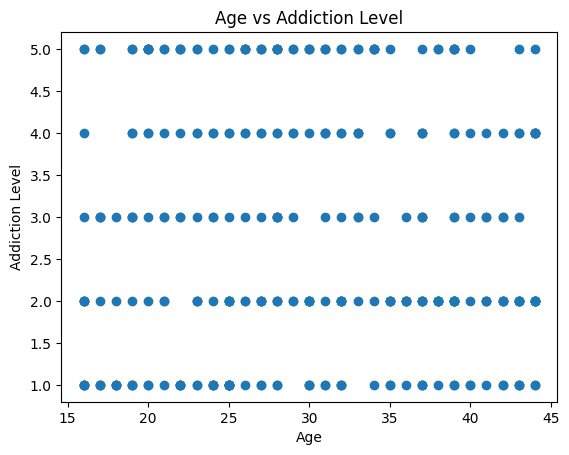

In [8]:
plt.scatter(df["Age"], df["Addiction level"])
plt.xlabel("Age")
plt.ylabel("Addiction Level")
plt.title("Age vs Addiction Level")
plt.show()

##### Avg Social Media Usage vs Addiction Level

C:\Users\jeeva\AppData\Local\Temp\ipykernel_7164\3057602761.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


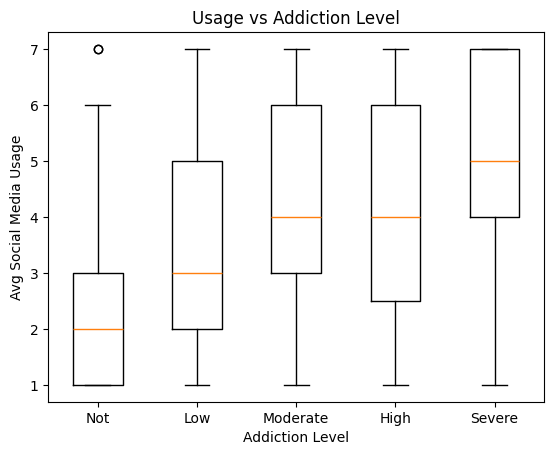

In [9]:
plt.boxplot(
    [df[df["Addiction level"] == i]["Avg Social Media Usage"] for i in range(1, 6)],
    labels=["Not", "Low", "Moderate", "High", "Severe"]
)
plt.xlabel("Addiction Level")
plt.ylabel("Avg Social Media Usage")
plt.title("Usage vs Addiction Level")
plt.show()


##### Correlation Heatmap

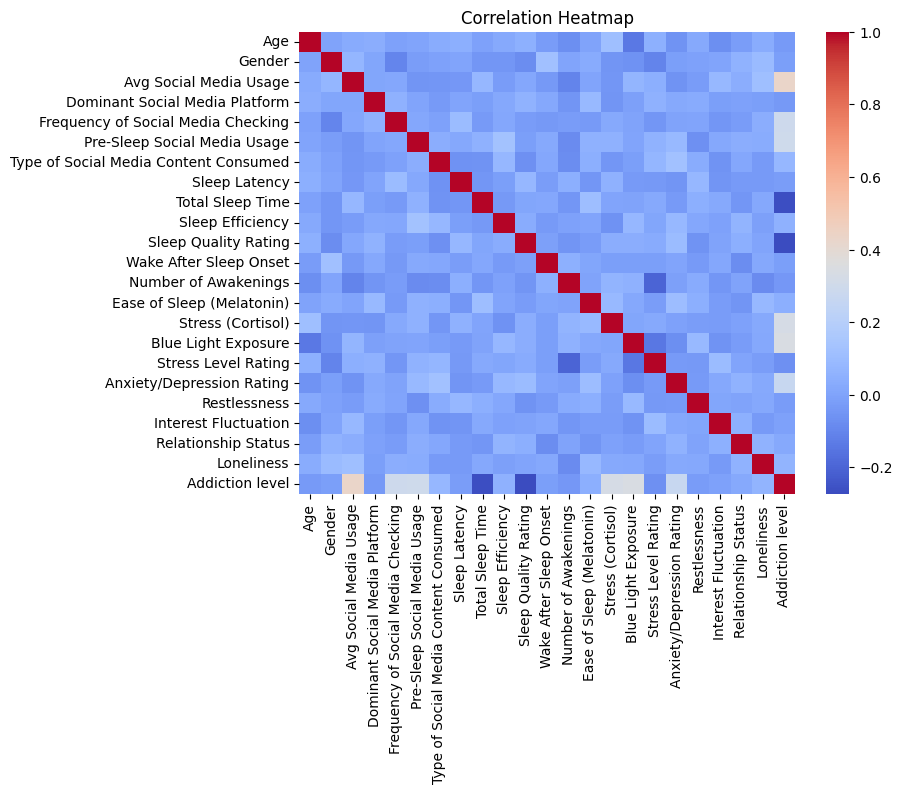

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Feature and Target Selection

In [11]:
X = df.drop("Addiction level", axis=1)
y = df["Addiction level"]-1

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (300, 22)
Target shape: (300,)


#### Feature Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Train_Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### XGBooster Model Train

In [14]:
model = XGBClassifier(
    objective="multi:softmax",
    num_class=5,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softmax'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fro

#### Evaluate Model

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.46      0.71      0.56        17
           2       0.29      0.25      0.27         8
           3       0.33      0.11      0.17         9
           4       0.73      0.67      0.70        12

    accuracy                           0.57        60
   macro avg       0.53      0.50      0.50        60
weighted avg       0.56      0.57      0.55        60



#### Testing with data

In [17]:
# Convert predictions back to original scale
y_pred_original = y_pred + 1

labels = {
    1: "Not Addicted",
    2: "Low Addiction",
    3: "Moderate Addiction",
    4: "High Addiction",
    5: "Severe Addiction"
}

sample_pred = y_pred_original[0]

print("Predicted Addiction Level:", sample_pred)
print(labels[int(sample_pred)])


Predicted Addiction Level: 2
Low Addiction


#### Saving the Model

In [18]:
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("model.pkl and scaler.pkl saved successfully")


model.pkl and scaler.pkl saved successfully
